# **EPIC 4 - MODELING**

## Objectives

- Train and validate the model on the prepared image datasets.

### Acceptance Criteria
- Image sets should initially be 70% training, 15% validation, and 15% test.
- Model performs 'well' on validation set - otherwise, return to Pre-process images #4

## Tasks
- Split the images into training, validation, and test sets.
- Plot the numbers of images in each set (LO 3.1).

## Inputs

- inputs/[datasets]: folders containing the prepare image datasets for each animal.

## Outputs

- Image datasets for each animal split into training, validation, and test sets.

---

# Import packages

In [28]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Set working directory

In [4]:
current_dir = os.getcwd()
print("Current working directory is:", current_dir)

Current working directory is: /Users/gingermale/Documents/repos/PP5/pet-image-classifier/jupyter_notebooks


In [5]:
os.chdir(os.path.dirname(current_dir)) # Change the current working directory to the parent directory
current_dir = os.getcwd() # Get the new current working directory
print("Changing the working directory to parent folder:", current_dir)

Changing the working directory to parent folder: /Users/gingermale/Documents/repos/PP5/pet-image-classifier


# Set input and output paths

In [6]:
work_dir = current_dir + '/inputs'
data_dir = work_dir + '/dataset'
train_dir = work_dir + '/train'
validate_dir = work_dir + '/validate'
test_dir = work_dir + '/test'

version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
  print('Old version is already available. Create a new version.')
  pass
else:
  os.makedirs(name=file_path)

Old version is already available. Create a new version.


# Set labels

In [5]:
labels = [name for name in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, name))]

print(
    f"Project Labels: {labels}"
    )

FileNotFoundError: [Errno 2] No such file or directory: '/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset'

# Split the images

First, we install sklearn library to split the images into training, validation, and test sets.

In [40]:
import shutil
import os
import random

def split_train_validate_test_images(data_dir, inputs_dir, train_set_ratio, validate_set_ratio, test_set_ratio):
  
  if train_set_ratio + validate_set_ratio + test_set_ratio != 1.0:
    print("train_set_ratio + validate_set_ratio + test_set_ratio should sum 1.0")
    return

  # gets classes labels
  labels = [name for name in os.listdir(data_dir) if name != '.DS_Store'] # ignore .DS_Store

  # create train, test folders with classess labels sub-folder
  for folder in ['train','validate','test']:
    for label in labels:
      os.makedirs(os.path.join(inputs_dir, folder, label), exist_ok=True)

  for label in labels:
    path = os.path.join(data_dir, label)
    if os.path.isdir(path):
        files = [name for name in os.listdir(path) if name != '.DS_Store'] # ignore .DS_Store
        random.shuffle(files)

    train_set_files_qty = int(len(files) * train_set_ratio)
    validate_set_files_qty = int(len(files) * validate_set_ratio)

    count = 1
    for file_name in files:
      if count <= train_set_files_qty:
        # move given file to train set
        shutil.move(os.path.join(data_dir, label, file_name),
                    os.path.join(inputs_dir, 'train', label, file_name))
        

      elif count <= (train_set_files_qty + validate_set_files_qty ):
        # move given file to validation set
        shutil.move(os.path.join(data_dir, label, file_name),
                    os.path.join(inputs_dir, 'validate', label, file_name))

      else:
        # move given file to test set
        shutil.move(os.path.join(data_dir, label, file_name),
                    os.path.join(inputs_dir, 'test', label, file_name))
        
      count += 1

    shutil.rmtree(os.path.join(data_dir, label))  # use shutil.rmtree() instead of os.rmdir()

In [41]:
split_train_validate_test_images(data_dir,
                        train_set_ratio = 0.7,
                        validate_set_ratio=0.15,
                        test_set_ratio=0.15
                        )

# Number of images in each set (LO 3.1)

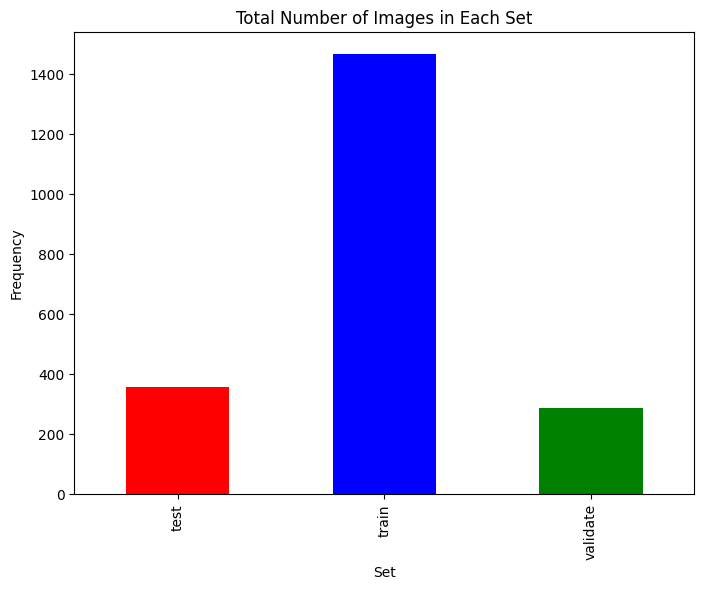

In [6]:
df_freq = pd.DataFrame(columns=['Set', 'Label', 'Frequency'])

# Update the work_dir to the new location
work_dir = '/Users/gingermale/Documents/repos/PP5/pet-image-classifier'

for folder in ['train', 'validate', 'test']:
    labels_dir = [f for f in os.listdir(os.path.join(work_dir, 'inputs', folder)) if not f.startswith('.')]
    for label in labels_dir:
        files = [f for f in os.listdir(os.path.join(work_dir, 'inputs', folder, label)) if not f.startswith('.')]
        count = len(files)
        df_to_append = pd.DataFrame([{'Set': folder, 'Label': label, 'Frequency': count}], columns=['Set', 'Label', 'Frequency'])
        df_freq = pd.concat([df_freq, df_to_append], ignore_index=True)

# Summarize data
df_summary = df_freq.groupby('Set')['Frequency'].sum().reset_index()

# Plotting
df_summary.plot(x='Set', y='Frequency', kind='bar', legend=False, color=['red', 'blue', 'green'], figsize=(8, 6))
plt.ylabel('Frequency')
plt.title('Total Number of Images in Each Set')
plt.show()

In [47]:
df_freq = pd.DataFrame(columns=['Set', 'Label', 'Frequency'])

# Update the work_dir to the new location
work_dir = '/Users/gingermale/Documents/repos/PP5/pet-image-classifier'

for folder in ['train', 'validate', 'test']:
    labels_dir = [f for f in os.listdir(os.path.join(work_dir, 'inputs', folder)) if not f.startswith('.')]
    for label in labels_dir:
        files = [f for f in os.listdir(os.path.join(work_dir, 'inputs', folder, label)) if not f.startswith('.')]
        count = len(files)
        df_to_append = pd.DataFrame([{'Set': folder, 'Label': label, 'Frequency': count}], columns=['Set', 'Label', 'Frequency'])
        df_freq = pd.concat([df_freq, df_to_append], ignore_index=True)

print(df_freq)

       Set                Label Frequency
0    train               Sphynx        21
1    train              Burmese        21
2    train     Springer Spaniel        21
3    train     Poison Dart Frog        21
4    train                 Degu        20
..     ...                  ...       ...
208   test                Boxer         5
209   test               Gerbil         5
210   test              Bulldog         5
211   test  Miniature Schnauzer         5
212   test         Eastern Newt         5

[213 rows x 3 columns]


---

# Augment Images

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Initialize ImageDataGenerator

In [8]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.10, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

Augment training images

In [19]:
batch_size = 20 # Set batch size
image_shape = [150, 150, 3]
train_set = augmented_image_data.flow_from_directory(train_dir,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True
                                              )

train_set.class_indices

Found 1468 images belonging to 71 classes.


{'Abyssinian': 0,
 'African Dwarf Frog': 1,
 'African Grey Parrot': 2,
 'American Shorthair': 3,
 'American Toad': 4,
 'Axolotl': 5,
 'Beagle': 6,
 'Bearded Dragon': 7,
 'Bengal': 8,
 'Border Collie': 9,
 "Bourke's Parakeet": 10,
 'Boxer': 11,
 'British Shorthair': 12,
 'Budgerigar': 13,
 'Bulldog': 14,
 'Burmese': 15,
 'Canary': 16,
 'Chameleon': 17,
 'Chinchilla': 18,
 'Cockatiel': 19,
 'Cockatoo': 20,
 'Cocker Spaniel': 21,
 'Crested Gecko': 22,
 'Dachshund': 23,
 'Degu': 24,
 'Devon Rex': 25,
 'Eastern Newt': 26,
 'Egyptian Mau': 27,
 'Ferret': 28,
 'Finch': 29,
 'French Bulldog': 30,
 'Gerbil': 31,
 'German Shepherd': 32,
 'Golden Retriever': 33,
 'Great Dane': 34,
 'Green Iguana': 35,
 'Guinea Pig': 36,
 'Hamster': 37,
 'Horned Toad': 38,
 'Horse': 39,
 'Hyacinth Macaw': 40,
 'Jack Russell Terrier': 41,
 'Labrador Retriever': 42,
 'Leopard Gecko': 43,
 'Lovebird': 44,
 'Maine Coon': 45,
 'Miniature Schnauzer': 46,
 'Mouse': 47,
 'Parrotlet': 48,
 'Persian': 49,
 'Pionus Parrot': 

Augment validation images

In [20]:
image_shape = [150, 150, 3]
validate_set = ImageDataGenerator(rescale=1./255).flow_from_directory(validate_dir,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

validate_set.class_indices

Found 285 images belonging to 71 classes.


{'Abyssinian': 0,
 'African Dwarf Frog': 1,
 'African Grey Parrot': 2,
 'American Shorthair': 3,
 'American Toad': 4,
 'Axolotl': 5,
 'Beagle': 6,
 'Bearded Dragon': 7,
 'Bengal': 8,
 'Border Collie': 9,
 "Bourke's Parakeet": 10,
 'Boxer': 11,
 'British Shorthair': 12,
 'Budgerigar': 13,
 'Bulldog': 14,
 'Burmese': 15,
 'Canary': 16,
 'Chameleon': 17,
 'Chinchilla': 18,
 'Cockatiel': 19,
 'Cockatoo': 20,
 'Cocker Spaniel': 21,
 'Crested Gecko': 22,
 'Dachshund': 23,
 'Degu': 24,
 'Devon Rex': 25,
 'Eastern Newt': 26,
 'Egyptian Mau': 27,
 'Ferret': 28,
 'Finch': 29,
 'French Bulldog': 30,
 'Gerbil': 31,
 'German Shepherd': 32,
 'Golden Retriever': 33,
 'Great Dane': 34,
 'Green Iguana': 35,
 'Guinea Pig': 36,
 'Hamster': 37,
 'Horned Toad': 38,
 'Horse': 39,
 'Hyacinth Macaw': 40,
 'Jack Russell Terrier': 41,
 'Labrador Retriever': 42,
 'Leopard Gecko': 43,
 'Lovebird': 44,
 'Maine Coon': 45,
 'Miniature Schnauzer': 46,
 'Mouse': 47,
 'Parrotlet': 48,
 'Persian': 49,
 'Pionus Parrot': 

Augment test images

In [21]:
image_shape = [150, 150, 3]
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

test_set.class_indices

Found 357 images belonging to 71 classes.


{'Abyssinian': 0,
 'African Dwarf Frog': 1,
 'African Grey Parrot': 2,
 'American Shorthair': 3,
 'American Toad': 4,
 'Axolotl': 5,
 'Beagle': 6,
 'Bearded Dragon': 7,
 'Bengal': 8,
 'Border Collie': 9,
 "Bourke's Parakeet": 10,
 'Boxer': 11,
 'British Shorthair': 12,
 'Budgerigar': 13,
 'Bulldog': 14,
 'Burmese': 15,
 'Canary': 16,
 'Chameleon': 17,
 'Chinchilla': 18,
 'Cockatiel': 19,
 'Cockatoo': 20,
 'Cocker Spaniel': 21,
 'Crested Gecko': 22,
 'Dachshund': 23,
 'Degu': 24,
 'Devon Rex': 25,
 'Eastern Newt': 26,
 'Egyptian Mau': 27,
 'Ferret': 28,
 'Finch': 29,
 'French Bulldog': 30,
 'Gerbil': 31,
 'German Shepherd': 32,
 'Golden Retriever': 33,
 'Great Dane': 34,
 'Green Iguana': 35,
 'Guinea Pig': 36,
 'Hamster': 37,
 'Horned Toad': 38,
 'Horse': 39,
 'Hyacinth Macaw': 40,
 'Jack Russell Terrier': 41,
 'Labrador Retriever': 42,
 'Leopard Gecko': 43,
 'Lovebird': 44,
 'Maine Coon': 45,
 'Miniature Schnauzer': 46,
 'Mouse': 47,
 'Parrotlet': 48,
 'Persian': 49,
 'Pionus Parrot': 

(20, 150, 150, 3)


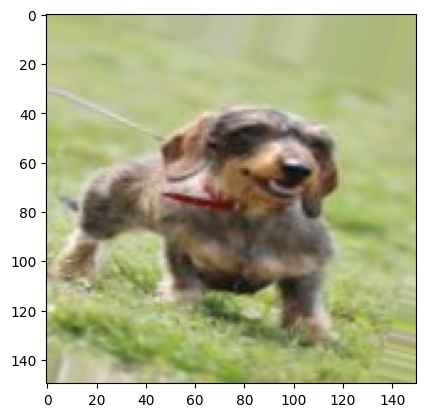

(20, 150, 150, 3)


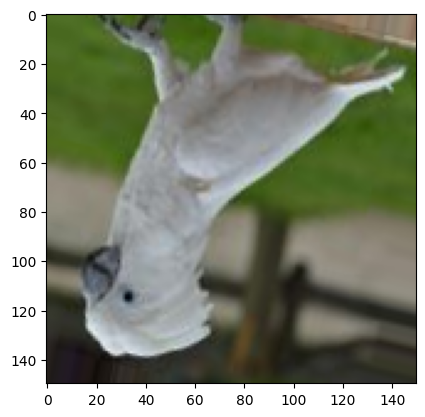

(20, 150, 150, 3)


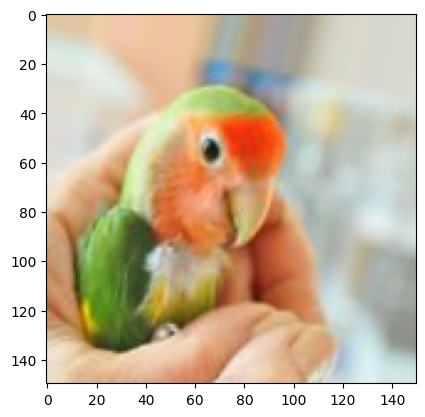

In [22]:
for _ in range(3):
    img, label = next(train_set)
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

Plot validation and test images

(20, 150, 150, 3)


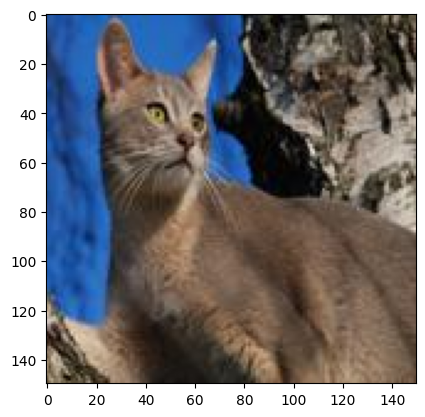

(20, 150, 150, 3)


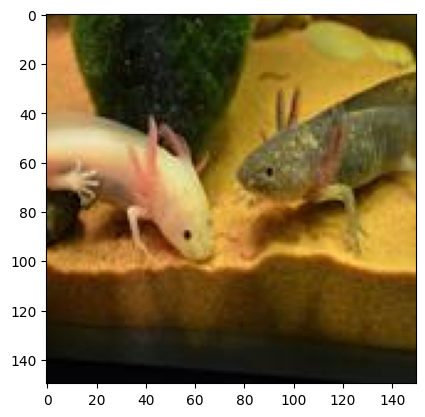

(20, 150, 150, 3)


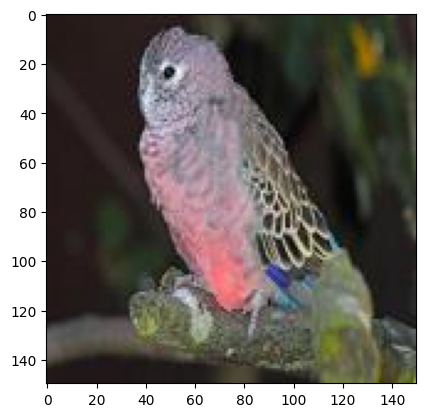

In [23]:
for _ in range(3):
    img, label = next(validate_set)
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

(20, 150, 150, 3)


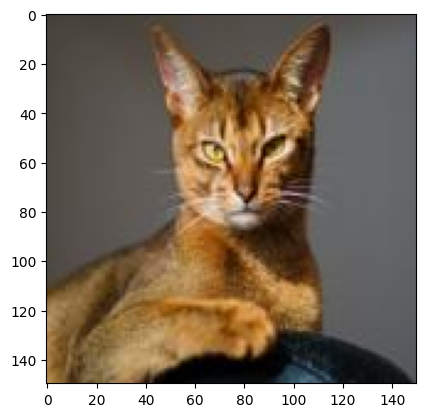

(20, 150, 150, 3)


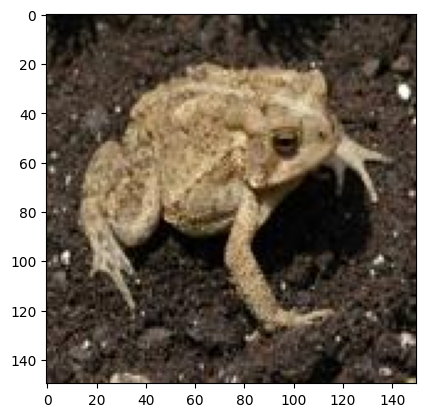

(20, 150, 150, 3)


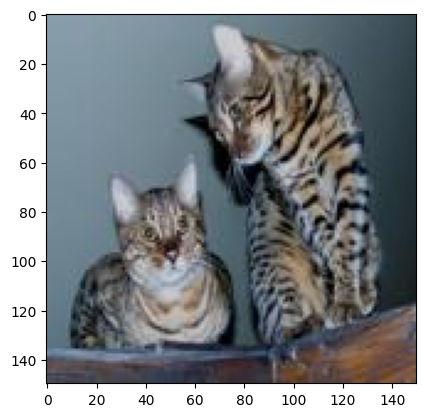

In [24]:
for _ in range(3):
    img, label = next(test_set)
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

Save class indices

In [29]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

# Train the Model

Import modeling packages

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [33]:
def create_tf_model(num_classes):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))

    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax')) # changed from sigmoid and 1 neuron to num_classes

    model.compile(loss='categorical_crossentropy', # changed from binary_crossentropy to categorical_crossentropy
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [34]:
num_classes = 71
create_tf_model(num_classes).summary()

/Users/gingermale/Documents/repos/PP5/pet-image-classifier/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 71)             │         9,159 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433,095 (9.28 MB)

 Trainable params: 2,433,095 (9.28 MB)

 Non-trainable params: 0 (0.00 B)